### Check if there exists a maximum distance in $\eta, \phi$ plot for correct matches between simjet and genjet

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import uproot
import awkward as ak
import pyjet

plt.style.use("scientific.mplstyle")
file = uproot.open("/eos/user/c/clange/PFNano/myNanoProdMc_NANO.root")
event_tree = file['Events']

In [3]:
max_idx = 20000
recojet_etas = event_tree['Jet_eta'].array(entry_stop=max_idx, library='np')
recojet_phis = event_tree['Jet_phi'].array(entry_stop=max_idx, library='np')

genjet_etas = event_tree['GenJet_eta'].array(entry_stop=max_idx, library='np')
genjet_phis = event_tree['GenJet_phi'].array(entry_stop=max_idx, library='np')

true_matching = event_tree['Jet_genJetIdx'].array(entry_stop=max_idx, library='np') # index pairs for reco and gen jets

In [4]:
deltaRs = []
for event_idx in range(max_idx):
    for recojet_idx, genjet_idx in enumerate(true_matching[event_idx]):
        if genjet_idx == -1:
            continue
        # sometimes true_matching contains index outside the bound of genjet 
        try:
            delta_eta = recojet_etas[event_idx][recojet_idx] - genjet_etas[event_idx][genjet_idx]
            delta_phi = recojet_phis[event_idx][recojet_idx] - genjet_phis[event_idx][genjet_idx]
            deltaRs.append(delta_eta**2 + delta_phi**2)
        except IndexError:
            continue

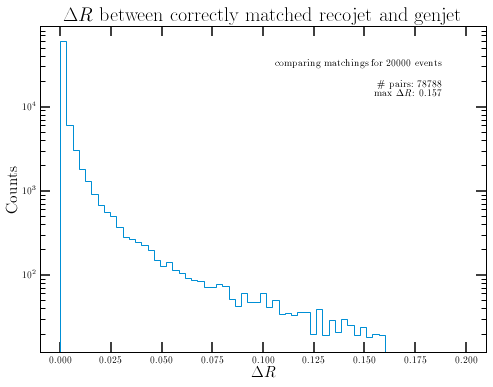

In [23]:
fig = plt.figure(figsize=(8,6))

values, bins, _ = plt.hist(deltaRs, bins=65, range=(0,0.2), histtype='step')
plt.title("$\Delta R$ between correctly matched recojet and genjet")
plt.yscale('log')
plt.xlabel("$\Delta R$")
plt.ylabel("Counts")
stats_str = "comparing matchings for {} events\n\n \# pairs: {:.0f}\nmax $\Delta R$: {:.3f}".format(max_idx, sum(values), bins[np.nonzero(values)[0][-1]])
plt.text(0.9, 0.9, stats_str, ha='right', va='top', transform = plt.gca().transAxes)
plt.show()

fig.savefig("plots/DeltaR_cutoff.pdf")

### Conclusion
Observe that for correct matchings we have $d < 0.2$. This motivates the implementation of a cut off value for $d$ in my matching algorithm. When the smallest available $d >= 0.2$, I claim that the jet can't be paired and is thus fake (i.e. set paired genjet index to $-1$).